# Multi-label Classification of enzyme substrates
<img src="https://storage.googleapis.com/kaggle-datasets-images/1444552/2389364/6c5e88a507107ad8bce5b46c95e39bb3/dataset-cover.png?t=2021-07-07-11-29-56">

<div class="sc-bMwZSo vtkVn"><div class="sc-gSVlWm eEDYRw"><h2 class="sc-csCMJt sc-fbJfA sc-gKcTBh gttkKI hmVOek">About Dataset</h2></div><div class="sc-fGiirT kuqdpD"><div class="sc-jDoktt qMsZA"><div style="min-height: 80px;"><div class="sc-iaZRkb kVPSsI sc-gJeKJY ePqTuh"><h2>Background</h2>
<p>Enzymes are known to act on molecules with structural similarities with their substrates. This behaviour is called promiscuity. Scientists working in drug discovery use this behaviour to target/design drugs to either block or promote biological actions. But, correct prediction of EC class(s) of substrates associated with enzymes has been a challenge in biology. Since there is no shortage of data, ML techniques can be employed to solve the aforementioned problem.</p>
<h3>Points to keep in mind</h3>
<ol>
<li>Substrate molecules can belong to multiple EC-Classes at the same time as same molecules participate in different types of reactions in biology</li>
<li>Dataset is highly imbalanced in labels</li>
</ol>
<ul>
<li>Need an algorithm that can tackle label imbalance</li>
<li>Smallest label count is 1 and highest label count is 248</li>
</ul>


In [1]:
import pandas as pd                    # Import the pandas library for data manipulation and analysis
import numpy as np                     # Import the numpy library for numerical operations
import matplotlib.pyplot as plt        # Import the matplotlib library for data visualization
import plotly.express as exp           # Import the plotly express library for interactive plotting

import warnings                        # Import the warnings module to handle warning messages
warnings.filterwarnings('ignore')      # Ignore any warning messages

In [2]:
train = pd.read_csv('train.csv', index_col=0)  # Read the CSV file into a DataFrame
train.head()                                  # Display the first few rows of the DataFrame

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [3]:
train.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,10.435316,...,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,13.651843,...,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,0.000000,...,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,6.420822,...,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,12.841643,...,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,99.936429,...,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

In [5]:
test=pd.read_csv('test.csv',index_col=0)
test.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
id,,,,,,,,,,,,,,,,,,,,,
14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,0.000000,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,6.420822,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,47.360206,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [6]:
rows,col=train.shape
print(f'No. of rows: {rows}\nNo. of Columns: {col}')

No. of rows: 14838
No. of Columns: 37


In [7]:
y = [i for i in train.columns if i not in test.columns]
X = train.iloc[:,:-6]
Y = train[y]

X.head()
X.shape

(14838, 31)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scl = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scl.shape

(14838, 31)

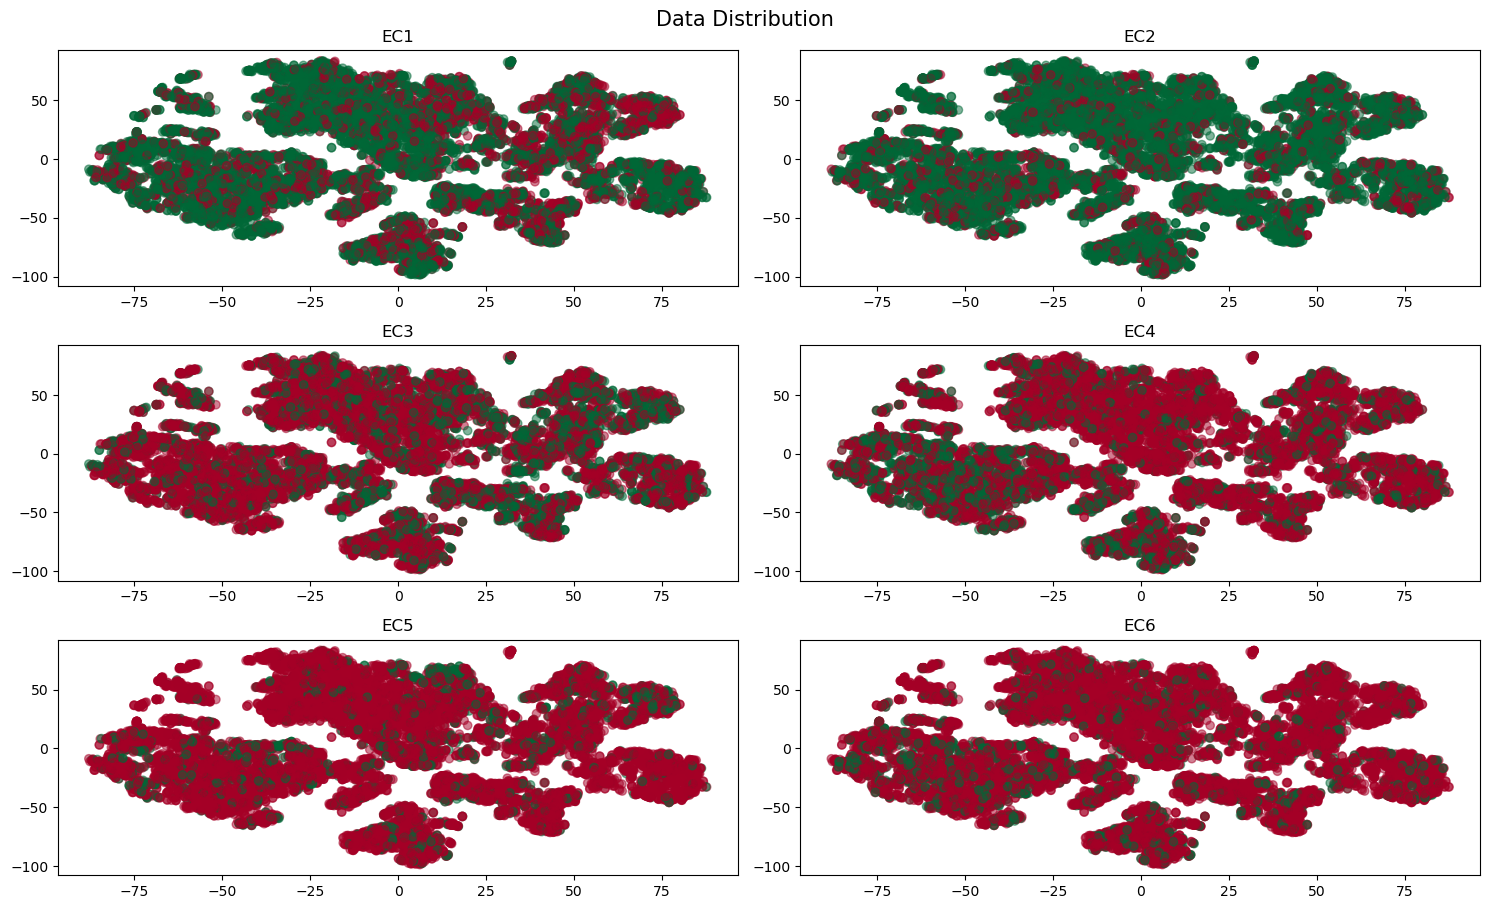

In [9]:
from sklearn.manifold import TSNE

# tsne = TSNE()
# comp = pd.DataFrame(tsne.fit_transform(X_scl),columns=['a','b'])
# comp.to_csv('Comp.csv',index=False)
comp=pd.read_csv('Comp.csv')

plt.figure(figsize=(15,15))
plt.suptitle('Data Distribution',fontsize=15)

for ind,val in enumerate(y):
    plt.subplot(5,2,ind+1)
    plt.scatter(comp.a,comp.b,alpha=.5,c=train[val],cmap='RdYlGn')
    plt.title(val)

plt.savefig('Distribution.jpg')
plt.tight_layout()
plt.show()

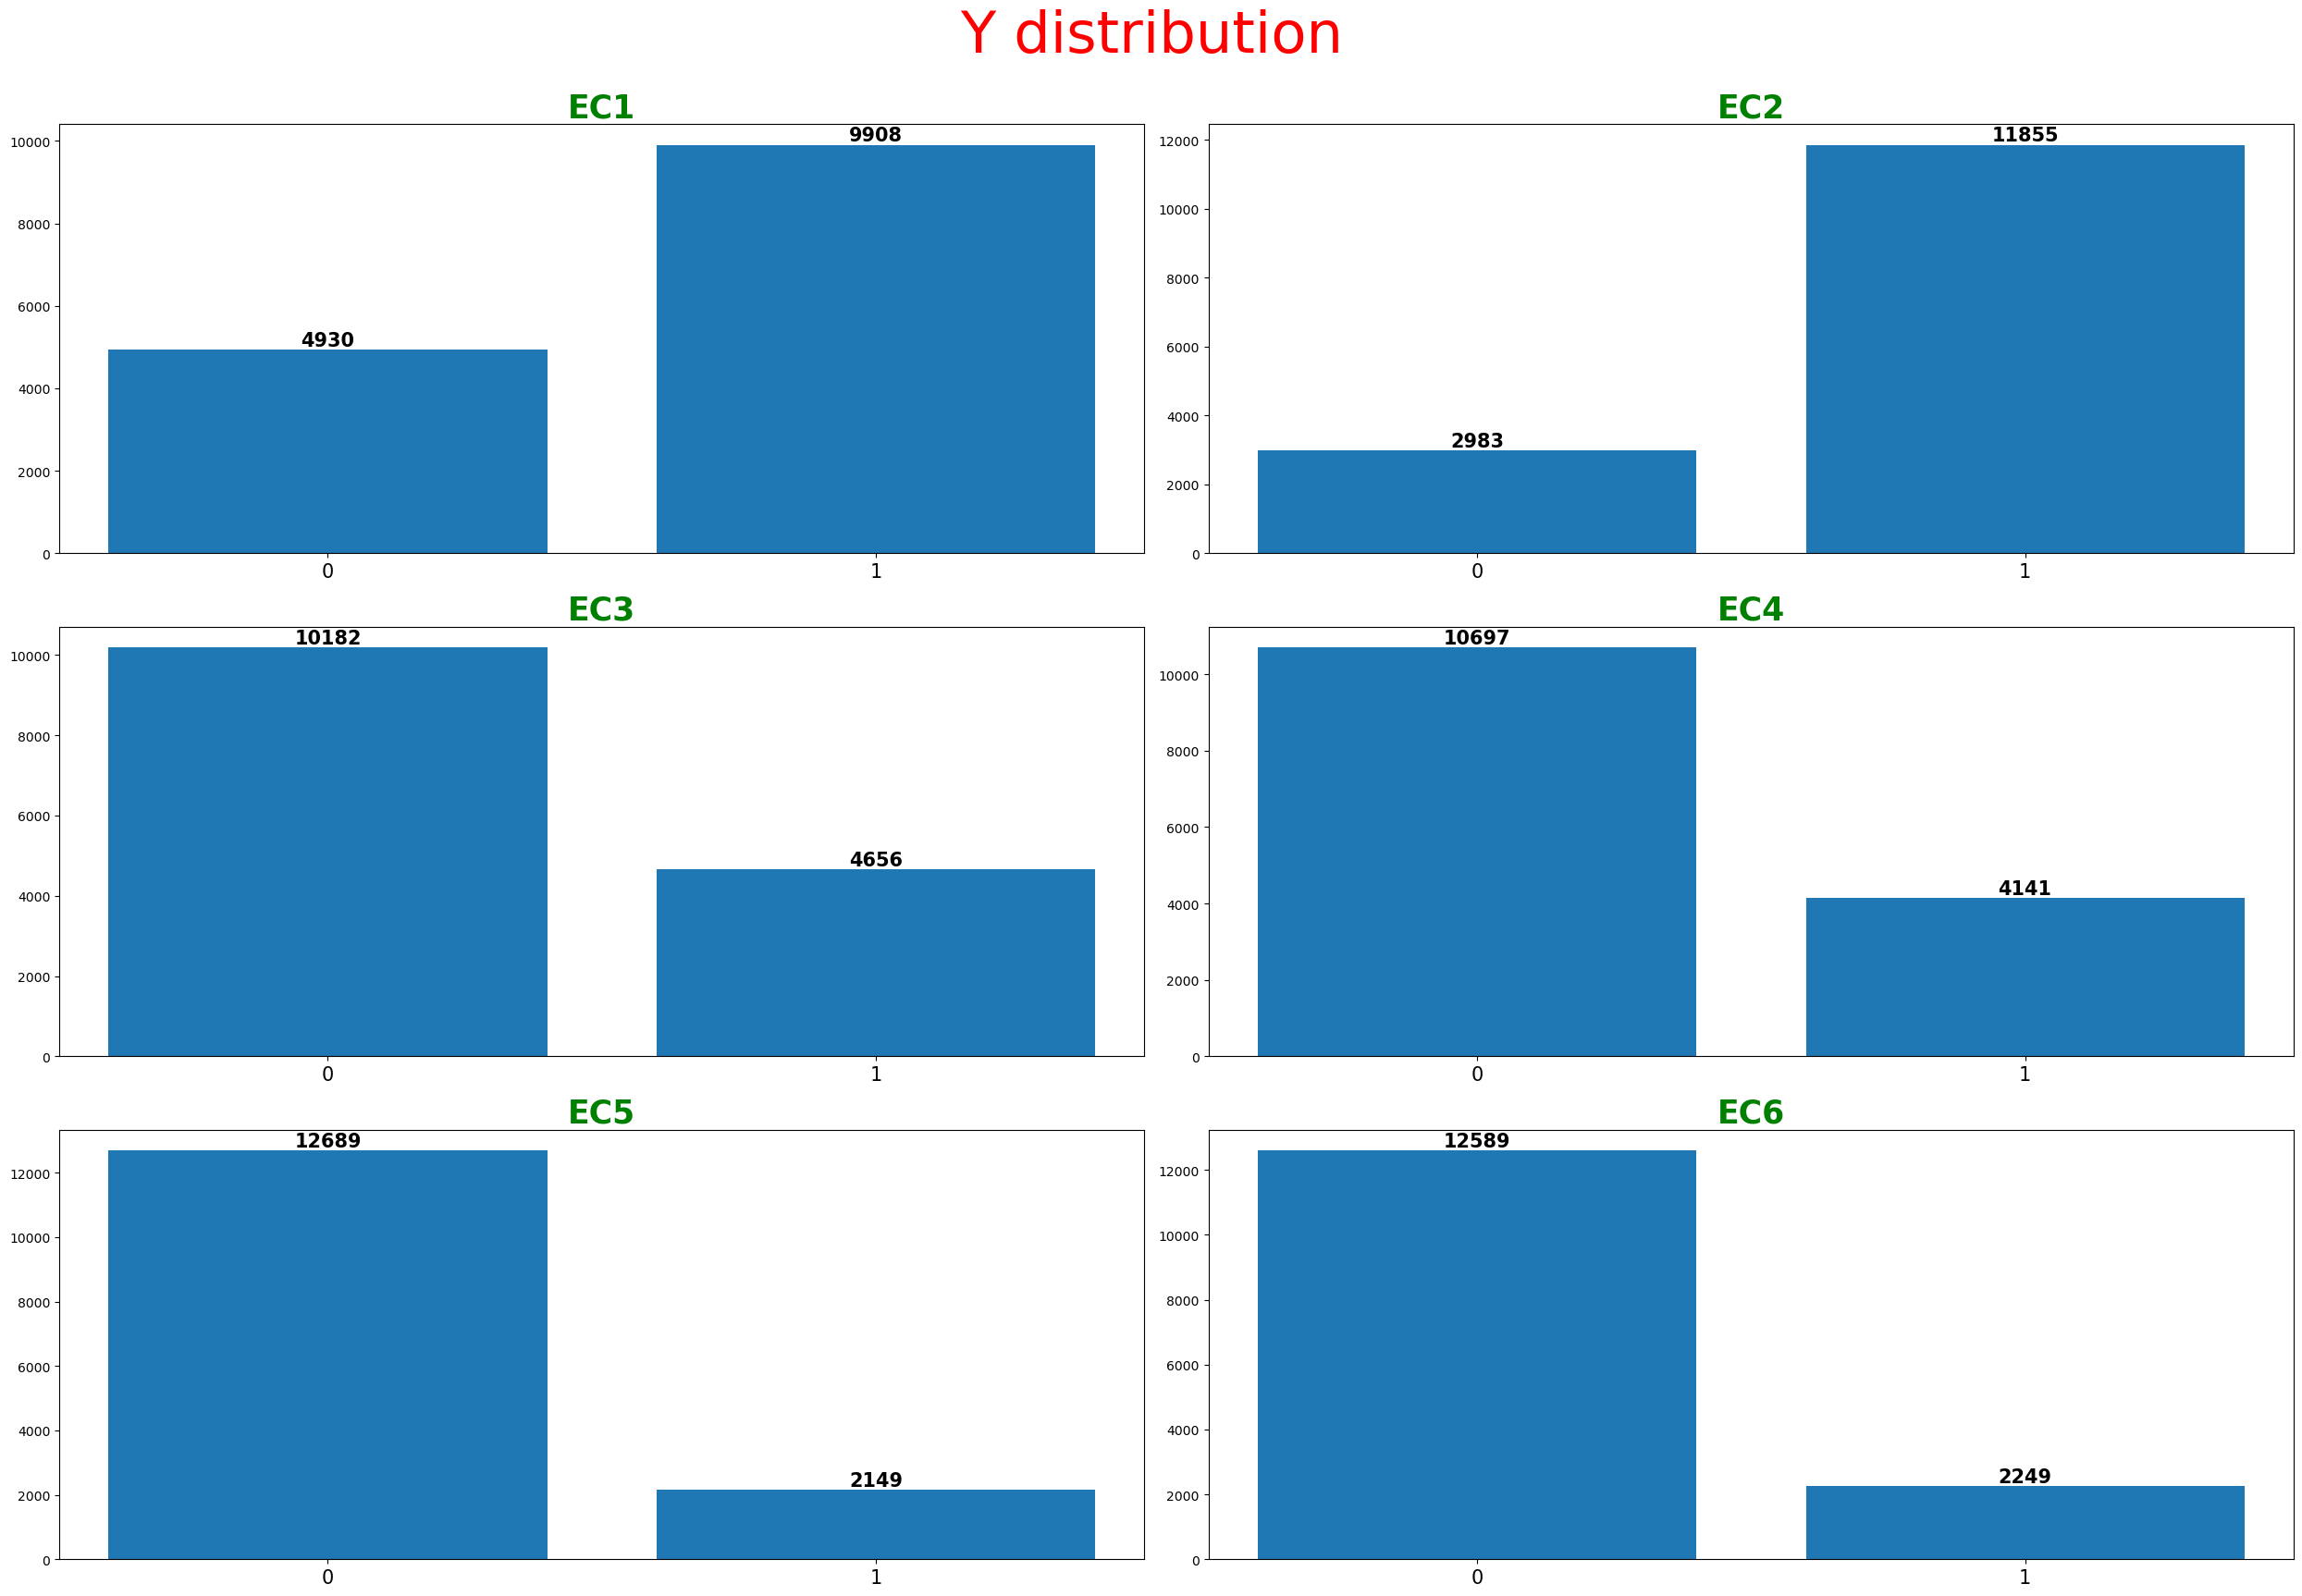

In [10]:
plt.figure(figsize=(25, 55))
plt.suptitle('Y distribution', fontsize=45, va='top', y=1, color='red')

for index, val in enumerate(Y):
    x = Y[val].value_counts().keys()
    height = Y[val].value_counts().values
    plt.subplot(10, 2, index+1)
    bars = plt.bar(x, height)
    plt.xticks([0, 1], fontsize=15)
    plt.title(val, fontsize=25, color='green', fontweight='bold')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom', fontsize=15, fontweight='bold')

plt.savefig('Y_Distribution.jpg')
plt.tight_layout()
plt.show()

In [12]:
# from ydata_profiling import ProfileReport

# # Generate the profiling report
# report = ProfileReport(train)

# # Display the report in the notebook
# report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]